[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Initial Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22036 entries, 0 to 22035
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22036 non-null  object
 1   hd      22036 non-null  int64 
 2   cv      22036 non-null  int64 
 3   vo      22036 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 688.8+ KB
None
                 hd            cv            vo
count  22036.000000  22036.000000  22036.000000
mean       0.084271      0.005945      0.062579
std        0.277800      0.076875      0.242210
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max        1.000000      1.000000      1.000000
Initial Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5510 entries, 0 to 5509
Data columns (total 4 columns):
 #   Column  Non-Null 

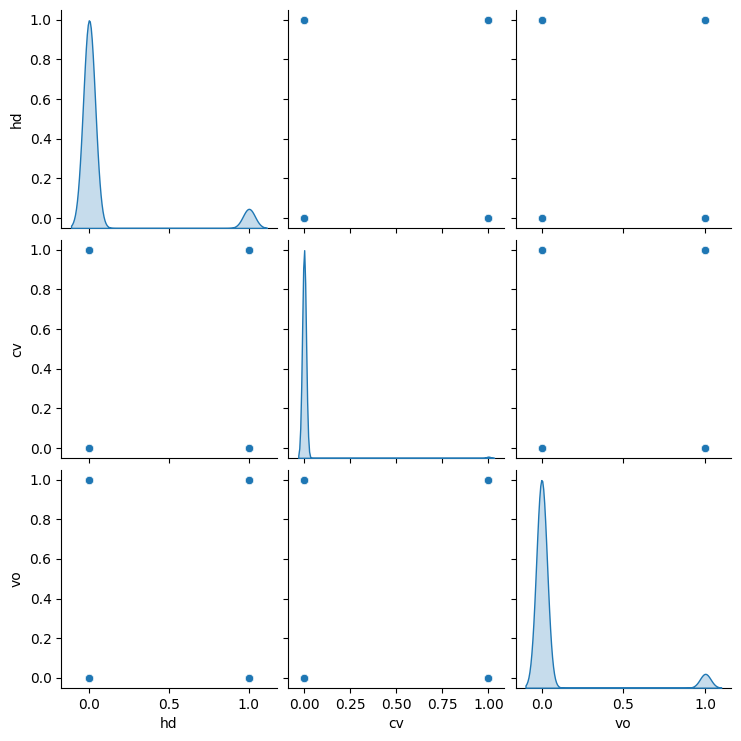

Data after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22036 entries, 0 to 22035
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    22036 non-null  object 
 1   hd      22036 non-null  float64
 2   cv      22036 non-null  float64
 3   vo      22036 non-null  float64
dtypes: float64(3), object(1)
memory usage: 688.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5510 entries, 0 to 5509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    5510 non-null   object 
 1   hd      5510 non-null   float64
 2   cv      5510 non-null   float64
 3   vo      5510 non-null   float64
dtypes: float64(3), object(1)
memory usage: 172.3+ KB
None
Data after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 21853 entries, 0 to 22035
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from scipy import stats
import re
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the TSV files
train_file_path = r'F:\moVies\Springboard\data\ghc_train.tsv'
test_file_path = r'F:\moVies\Springboard\data\ghc_test.tsv'
train_df = pd.read_csv(train_file_path, sep='\t')
test_df = pd.read_csv(test_file_path, sep='\t')

# Display initial data summary
print("Initial Train DataFrame Info:")
print(train_df.info())
print(train_df.describe())
print("Initial Test DataFrame Info:")
print(test_df.info())
print(test_df.describe())

# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase for consistency
    text = text.lower()
    # Remove punctuation and numbers to clean the text
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove stopwords and lemmatize words to reduce noise
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply text preprocessing
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)

# Display data after text preprocessing
print("Data after text preprocessing:")
print(train_df[['text']].head())
print(test_df[['text']].head())

# Visualize pairplot for numeric columns to inspect distributions and relationships
sns.pairplot(train_df.select_dtypes(include=[np.number]), diag_kind='kde')
plt.show()

# Handle missing values using KNN imputer to ensure data completeness
imputer = KNNImputer(n_neighbors=5)
numeric_columns = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_columns] = imputer.fit_transform(train_df[numeric_columns])
test_df[numeric_columns] = imputer.transform(test_df[numeric_columns])

# Display data after handling missing values
print("Data after handling missing values:")
print(train_df.info())
print(test_df.info())

# Remove duplicates to maintain unique records in the datasets
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

# Display data after removing duplicates
print("Data after removing duplicates:")
print(train_df.info())
print(test_df.info())

# Detect and handle outliers using Z-score to ensure data is within a reasonable range
z_scores = np.abs(stats.zscore(train_df.select_dtypes(include=[np.number])))
train_df = train_df[(z_scores < 3).all(axis=1)]
z_scores_test = np.abs(stats.zscore(test_df.select_dtypes(include=[np.number])))
test_df = test_df[(z_scores_test < 3).all(axis=1)]

# Display data after handling outliers
print("Data after handling outliers:")
print(train_df.info())
print(test_df.info())

# Normalize/Standardize numerical data to have mean=0 and variance=1 for uniformity
numerical_columns = ['hd', 'cv', 'vo']  # Replace with actual numerical column names
scaler = StandardScaler()
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Display data after normalization/standardization
print("Data after normalization/standardization:")
print(train_df.describe())
print(test_df.describe())

# Ensure categorical columns are specified correctly
categorical_columns = []  # Update with actual categorical column names

# Encode categorical data using one-hot encoding to convert categorical features to numerical
if categorical_columns:
    train_df = pd.get_dummies(train_df, columns=categorical_columns)
    test_df = pd.get_dummies(test_df, columns=categorical_columns)

    # Ensure train and test dataframes have the same columns after one-hot encoding
    train_df, test_df = train_df.align(test_df, join='inner', axis=1)

    # Display data after one-hot encoding
    print("Data after one-hot encoding:")
    print(train_df.info())
    print(test_df.info())

# Add text length features to provide insights on text verbosity
train_df['text_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['avg_word_length'] = train_df['text_length'] / train_df['word_count']
test_df['text_length'] = test_df['text'].apply(len)
test_df['word_count'] = test_df['text'].apply(lambda x: len(x.split()))
test_df['avg_word_length'] = test_df['text_length'] / test_df['word_count']

# Display
# Display data after adding text length features
print("Data after adding text length features:")
print(train_df.describe())
print(test_df.describe())

# Add sentiment features to capture the emotional tone of the text
train_df['sentiment_polarity'] = train_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_df['sentiment_subjectivity'] = train_df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
test_df['sentiment_polarity'] = test_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
test_df['sentiment_subjectivity'] = test_df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Display data after adding sentiment features
print("Data after adding sentiment features:")
print(train_df.describe())
print(test_df.describe())

# Text vectorization using TF-IDF with n-grams for better text representation
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train_text = vectorizer.fit_transform(train_df['text']).toarray()
X_test_text = vectorizer.transform(test_df['text']).toarray()

# Combine text features with other features
X_train = np.hstack((train_df.drop(columns=['text']).values, X_train_text))
X_test = np.hstack((test_df.drop(columns=['text']).values, X_test_text))

# Save cleaned data to TSV files
pd.DataFrame(X_train).to_csv('cleaned_train.tsv', sep='\t', index=False)
pd.DataFrame(X_test).to_csv('cleaned_test.tsv', sep='\t', index=False)

# Display final shape of the datasets
print("Final cleaned train dataset shape:", X_train.shape)
print("Final cleaned test dataset shape:", X_test.shape)

# Calculate and display overall changes
initial_train_shape = pd.read_csv(train_file_path, sep='\t').shape
initial_test_shape = pd.read_csv(test_file_path, sep='\t').shape
final_train_shape = X_train.shape
final_test_shape = X_test.shape

print(f"Initial train dataset shape: {initial_train_shape}")
print(f"Initial test dataset shape: {initial_test_shape}")
print(f"Final cleaned train dataset shape: {final_train_shape}")
print(f"Final cleaned test dataset shape: {final_test_shape}")
